<a href="https://colab.research.google.com/github/Azefalo/Machine_Learning/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

The objective of the regression is the prediction of the hydrodynamic performance of sailing yachts from dimensions and velocity.
The **inputs** are linked to dimension and hydrodynamics characteristics:
1. Longitudinal position of the center of buoyancy
(*flottabilité*), adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam -draught ratio ((*tiran d’eau*), adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional

**Target value/predicted value (Output)** = Residuary resistance per unit weight of
displacement, adimensional

In [1]:
# Import some useful libraries and functions

import numpy as np
import pandas

def print_stats(dataset):
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())

In [2]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'

import os.path
import requests

if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/2223-ae/tp1/' + filename)
    open(filename , 'wb').write(r.content)

print('Dataset available')

Dataset available


### Explore the dataset

- how many examples are there in the dataset?
- how many features for each example?
- what is the ground truth of the 10th example

In [3]:
# load the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, 0:-1] # examples features -  all rows with all elements in rows except last one
Y = dataset[:, -1]  # ground truth - last element in all rows

# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")

f([-5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([-5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([-2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([-5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([0.    0.53  4.78  3.75  3.15  0.175]) = 0.59


**Answer**:

In [4]:
count_examples = 0  # Examples : Number of lines
for data in dataset:
  count_examples += 1

count_features = 0 # Features : Number os coloms in each example
for data in X[0]:
  count_features += 1


print(f"The number of examples is : {count_examples}")
print(f"The number of features is : {count_features}")
print(f"The ground truth of the 10th example is : {Y[10-1]}")

The number of examples is : 308
The number of features is : 6
The ground truth of the 10th example is : 1.83


The following command adds a column to the inputs.

- what is in the value added this column?
- why are we doing this?

In [5]:
X = np.insert(X, 0, np.ones((len(X))), axis= 1)
print_stats(X)

           0           1           2           3           4           5  \
count  308.0  308.000000  308.000000  308.000000  308.000000  308.000000   
mean     1.0   -2.381818    0.564136    4.788636    3.936818    3.206818   
std      0.0    1.513219    0.023290    0.253057    0.548193    0.247998   
min      1.0   -5.000000    0.530000    4.340000    2.810000    2.730000   
25%      1.0   -2.400000    0.546000    4.770000    3.750000    3.150000   
50%      1.0   -2.300000    0.565000    4.780000    3.955000    3.150000   
75%      1.0   -2.300000    0.574000    5.100000    4.170000    3.510000   
max      1.0    0.000000    0.600000    5.140000    5.350000    3.640000   

                6  
count  308.000000  
mean     0.287500  
std      0.100942  
min      0.125000  
25%      0.200000  
50%      0.287500  
75%      0.375000  
max      0.450000  


**Answer**:

In [6]:
# np.insert(arr, obj, values, axis=None)
# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")
print("\nSo this commands adds a colom of zeros in the position 0 of X")
print("We are doing this to add the value 1 to w0")
print("This allows us to treat the operations and expressons more simple")
print("Because now the expresson is the same of everybody: Σ (wi * xi)")

f([ 1.   -5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([ 1.    -5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([ 1.    -2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([ 1.    -5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([1.    0.    0.53  4.78  3.75  3.15  0.175]) = 0.59

So this commands adds a colom of zeros in the position 0 of X
We are doing this to add the value 1 to w0
This allows us to treat the operations and expressons more simple
Because now the expresson is the same of everybody: Σ (wi * xi)


## Creating the perceptron

![Perceptron for regression](https://arbimo.github.io/tp-supervised-learning/2223-ae/tp1/perceptron-regression.png)

We now want to define a perceptron, that is, a function of the form:

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

- Complete the code snippet below to:
  - create the vector of weight `w`, initialize to arbitrary values (we suggest 0)
  - implement the `h` function that evaluate an example based on the vector of weights
  - check if this works on a few examples

In [7]:
w = [1, 1, 1, 1, 1, 1, 1]

def h(w, x):
  h = 0
  for i in range(len(w)):
    h += w[i] * x[i]
  return h
  # Or only : return np.dot(w,x)

test = h(w,X[0])
print(test)


# print the ground truth and the evaluation of h_w on the first example

9.120000000000001


## Loss function

Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.

In [8]:
def loss(w, x, y):
  return (h(w,x)-y)**2

print(loss(w,X[0],Y[0]))

0.2500000000000018


## Empirical loss

Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.
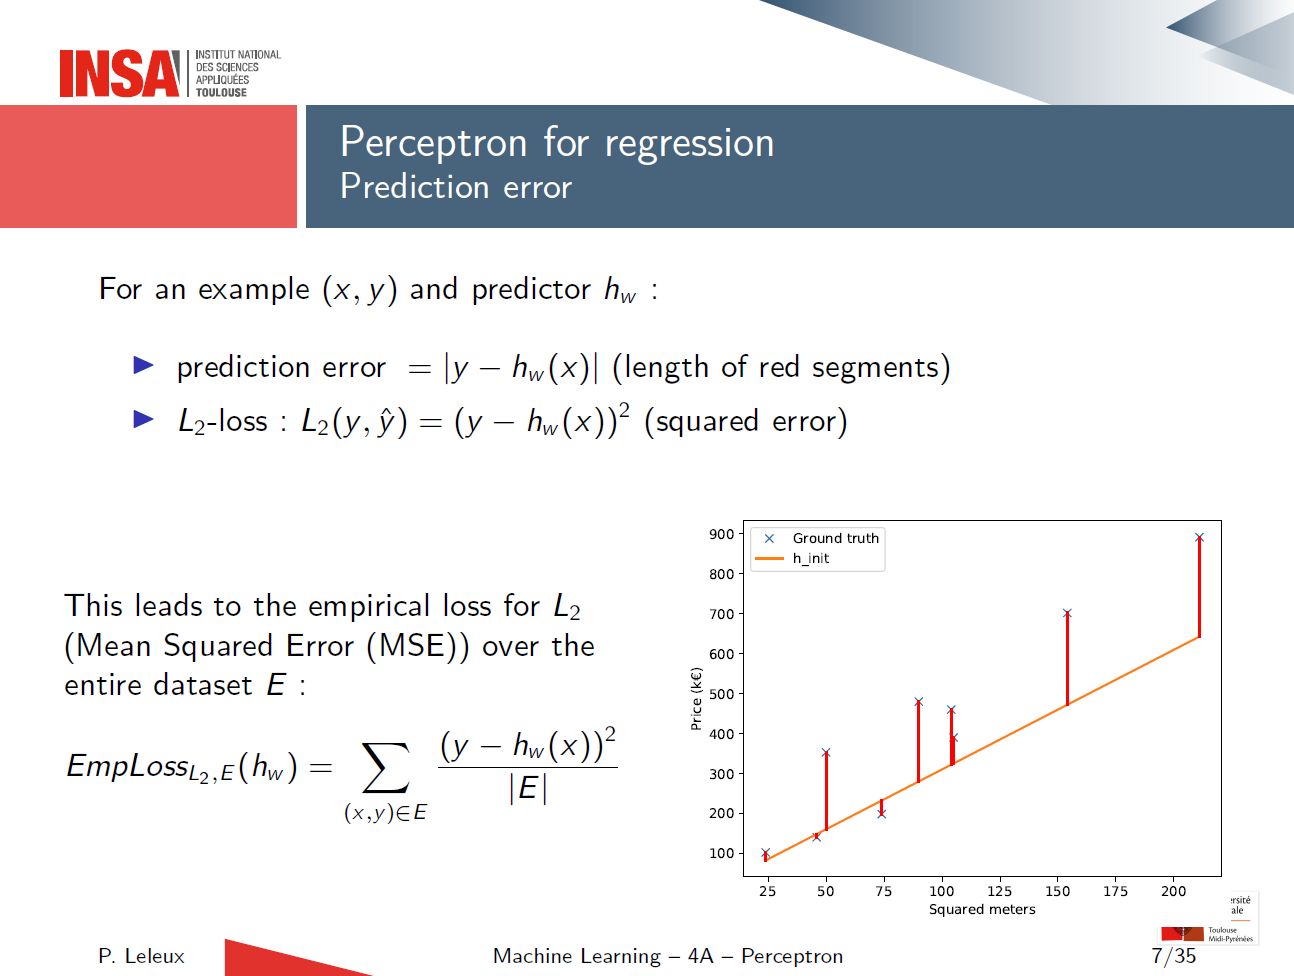

In [9]:
def emp_loss(w, X, Y):
  add = 0
  for i in range(len(Y)):
    add += loss(w,X[i],Y[i])
  res = add / len(Y)
  return res

emp_loss(w,X,Y)

229.62868491558436

## Gradient update

A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

(you can look at slide 32 of the ANN lecture slides for an example)
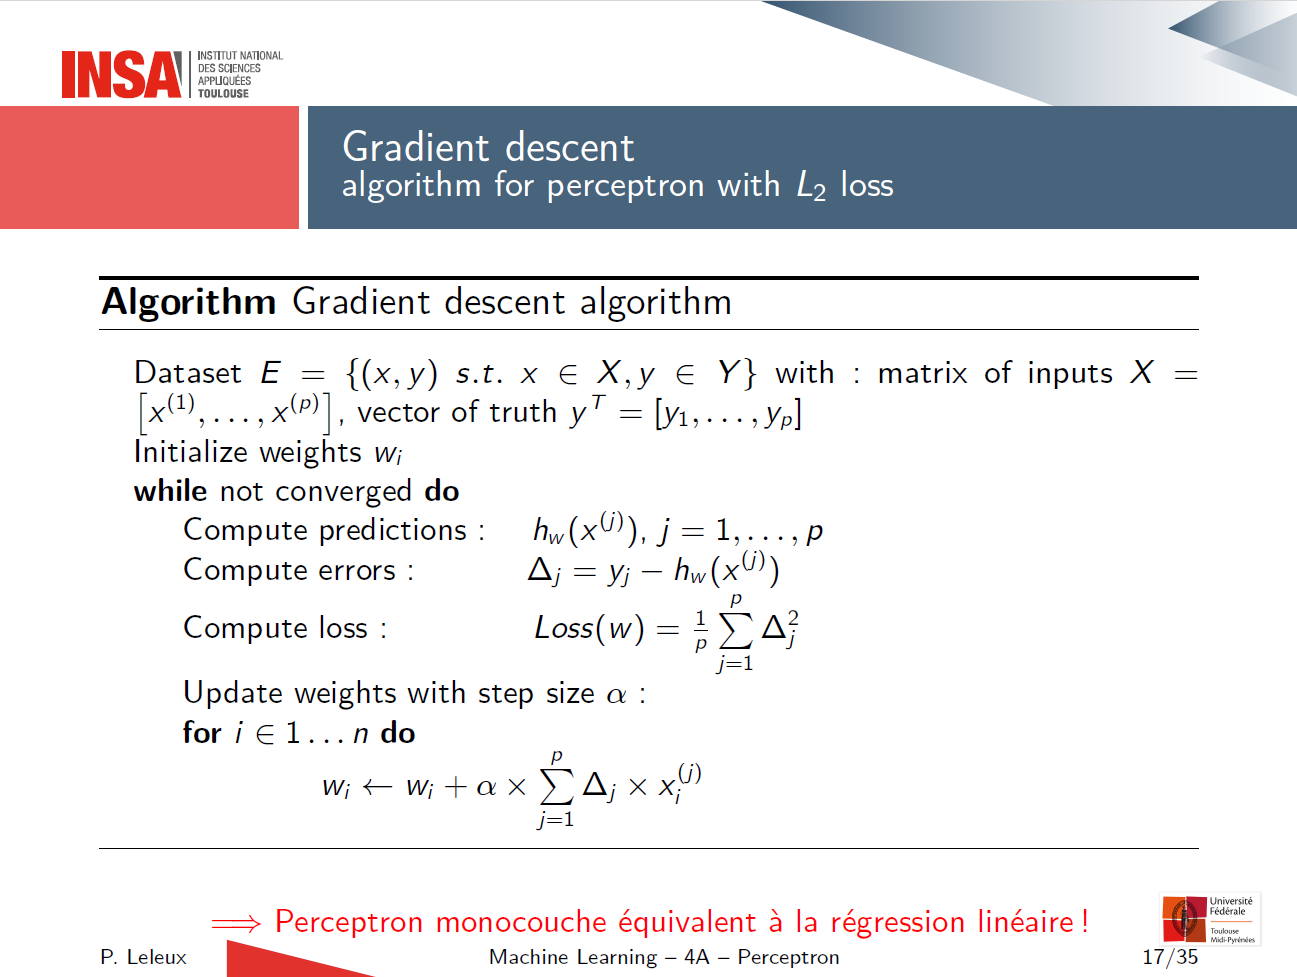

In [10]:
def compute_update(w, X, Y, alpha):
  dw = [0 for _ in range(len(w))]
  for j in range(len(Y)):
    for i in range(len(dw)):
      delta = Y[j] - h(w,X[j])
      dw[i] += alpha * (delta) * X[j,i]
  return dw

print(w)
compute_update(w, X, Y, alpha = 10e-7)

[1, 1, 1, 1, 1, 1, 1]


[-0.00027927400000000025,
 9.82236e-05,
 -0.0001618118389999999,
 -0.0013891775700000007,
 -0.0012256563100000002,
 -0.0009122661100000008,
 0.000297171975]

## Gradient descent

Now implement the gradient descent algorithm that will:

- repeatedly apply an update the weights
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights

In [11]:
losses = []
def descent(w_init, X, Y, alpha, max_iter):
  global losses
  w = w_init
  for n in range(max_iter):
    dw = compute_update(w, X, Y, alpha)
    for i in range(len(w)):
      w[i] = w[i] + dw[i]
    losses.append(emp_loss(w,X,Y))
  return w

descent(w, X, Y, alpha = 10e-7, max_iter = 100000)

[1.273182679959994,
 0.19595436639999064,
 0.8570705774397691,
 0.3259755992214031,
 -0.41759030030900685,
 -0.10413398347384842,
 33.47620326288801]

## Exploitation

You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?
- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice? Plot the loss depending on the parameter values (and optionnaly the evolution of the loss)
- What is the loss associated with the final model?
- Is the final model the optimal one for a perceptron?
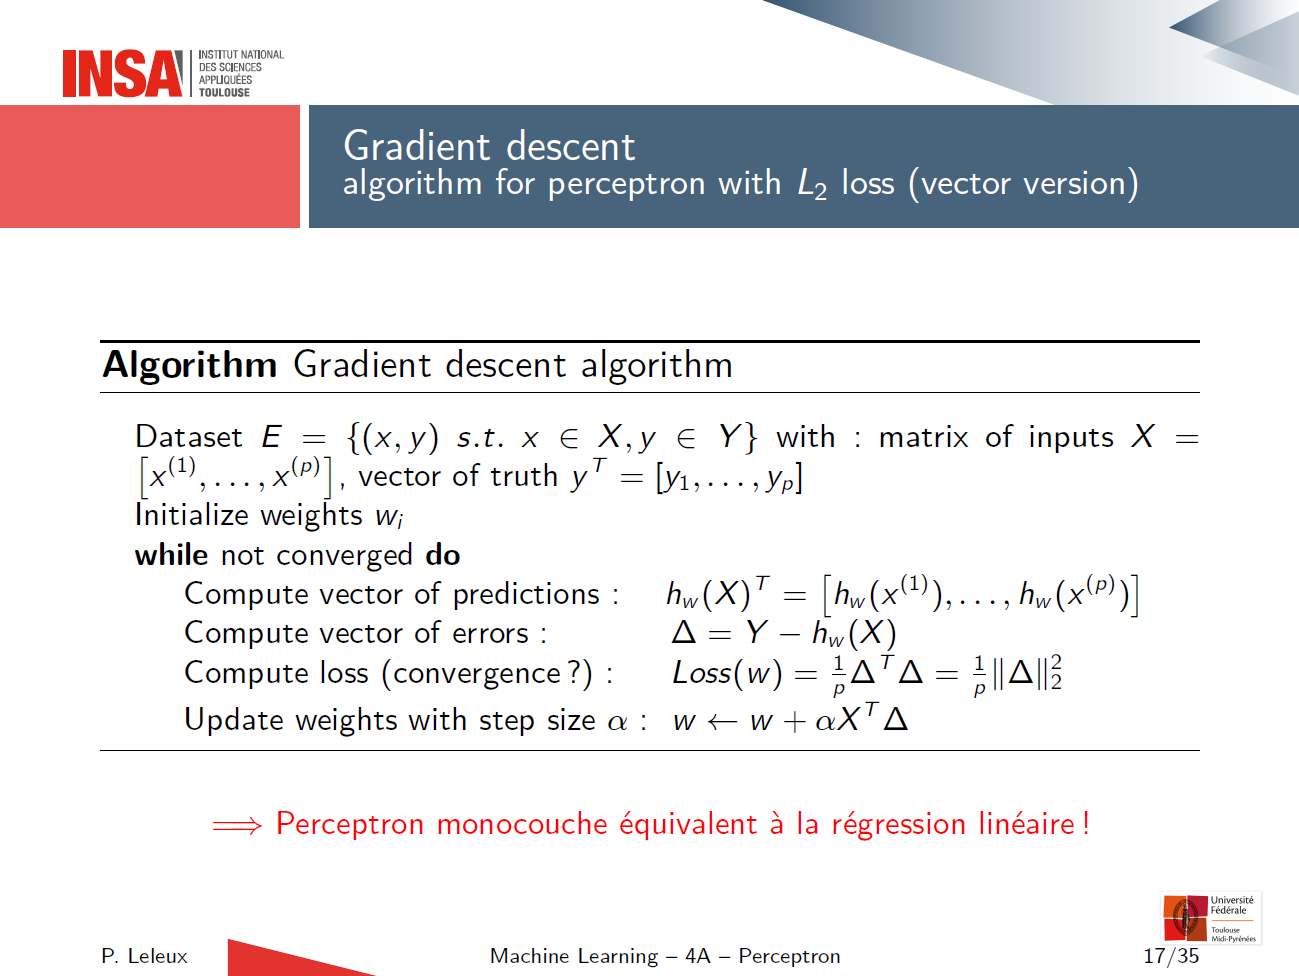

In [ ]:
losses
# Converges aprox 240

Text(0, 0.5, 'f(examples)')

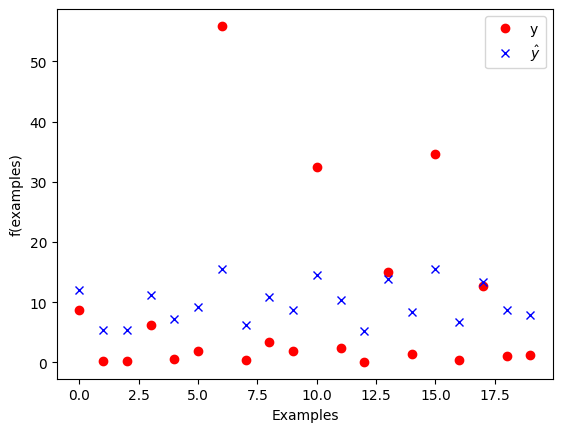

In [13]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction
import matplotlib.pyplot as plt

num_samples_to_plot = 20
plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')
yw = [h(w,x) for x in X]
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")
